In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Q1) a:Load the data into memory. Make an appropriate X matrix and y vector.

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_breast_cancer()
print(data.target_names)
X = data.data.astype(float) #Extract Training data from loaded_dataset and convert into appropriate format 
y = data.target
scaler = StandardScaler()
X = scaler.fit_transform(X) #Fit and transform the data 
print(X.shape, y.shape)


['malignant' 'benign']
(569, 30) (569,)


b:Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) #It tells train_test_split to split the data so that the class proportions in y are preserved in both the training and testing sets.

print(X_train.shape, X_test.shape)


(455, 30) (114, 30)


c:Give the objective of logistic regression with L2 regularization.

We use L2 regularization in logistic regression to prevent from overfitting.
Without regularization
Logistic regression just tries to fit the training data as well as possible.
If our dataset has many features the model might assign very large weights to some noisy features to perfectly fit the training data.
This can lead to overfitting the model works great on training data but fails on new test data.So to avoid this we are using L2 regularisation which adds penality for large weights and it keeps the weights balanced and small and prevents over fitting .

d:Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.

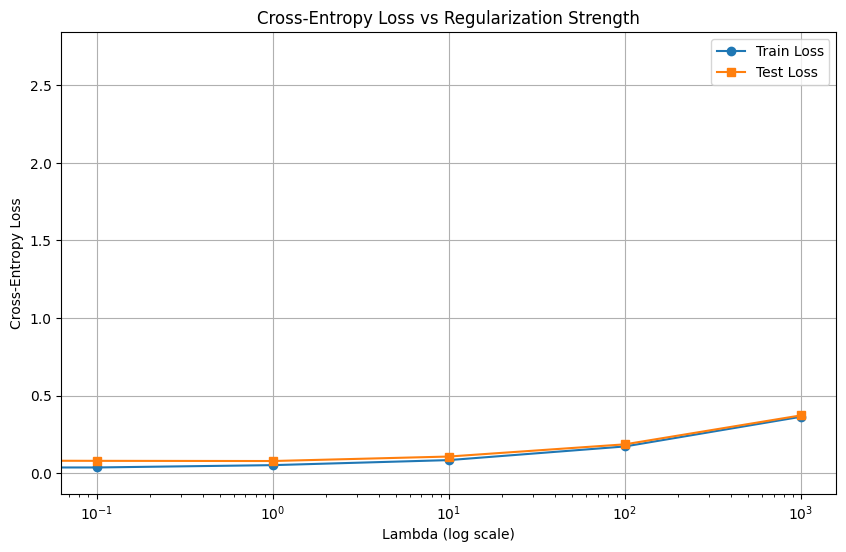

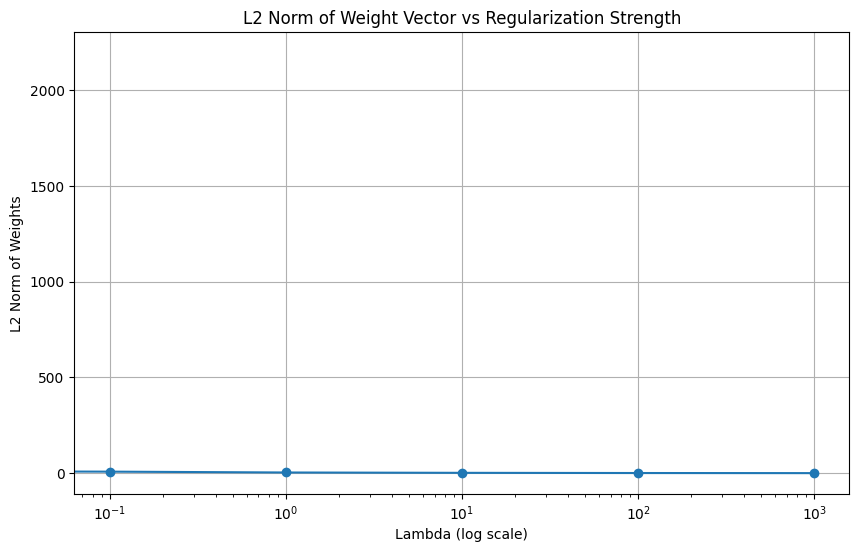

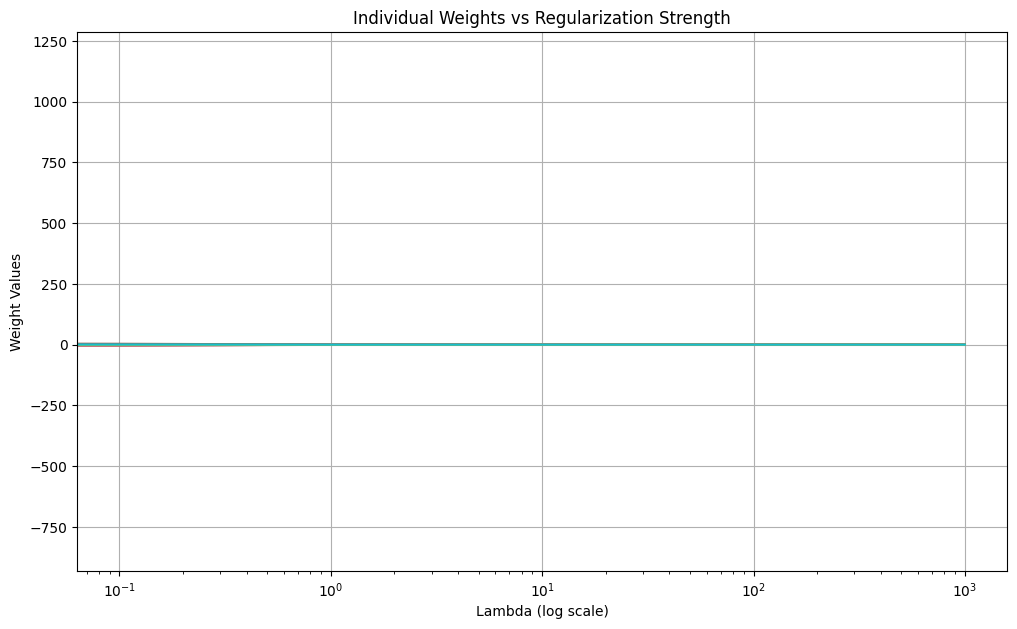

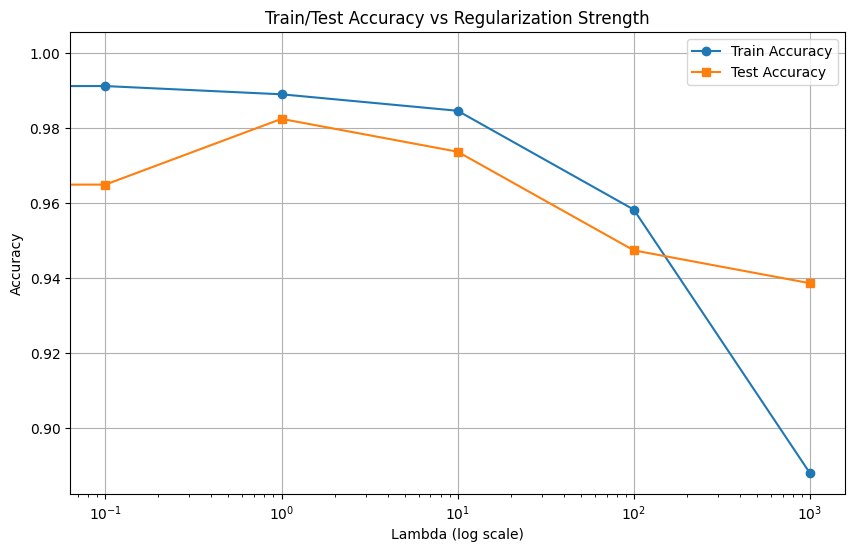

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

lambdas = [0, 0.1, 1, 10, 100, 1000]

train_losses = []
test_losses = []
weight_norms = []
all_weights = []
train_accs = []
test_accs = []

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=5000)
    else:
        model = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=5000)
    
    model.fit(X_train, y_train)

    # Predictions
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Cross entropy loss
    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

    # L2 norm of weights
    weight_norms.append(np.linalg.norm(model.coef_))

    # Store all weights
    all_weights.append(model.coef_.flatten())

    # Accuracy
    train_accs.append(accuracy_score(y_train, model.predict(X_train)))
    test_accs.append(accuracy_score(y_test, model.predict(X_test)))

# Cross-entropy vs lambda
plt.figure(figsize=(10,6))
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs Regularization Strength")
plt.legend()
plt.grid(True)
plt.show()

# Weight Norm vs lambda
plt.figure(figsize=(10,6))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("L2 Norm of Weight Vector vs Regularization Strength")
plt.grid(True)
plt.show()

# Weights vs lambda
all_weights=np.array(all_weights)
plt.figure(figsize=(12,7))
for j in range(all_weights.shape[1]):
    plt.plot(lambdas, all_weights[:,j], label=f'Weight {j}')
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("Weight Values")
plt.title("Individual Weights vs Regularization Strength")
plt.grid(True)
plt.show()

# Accuracy vs lambda
plt.figure(figsize=(10,6))
plt.plot(lambdas, train_accs, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_accs, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy vs Regularization Strength")
plt.legend()
plt.grid(True)
plt.show()


e:Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

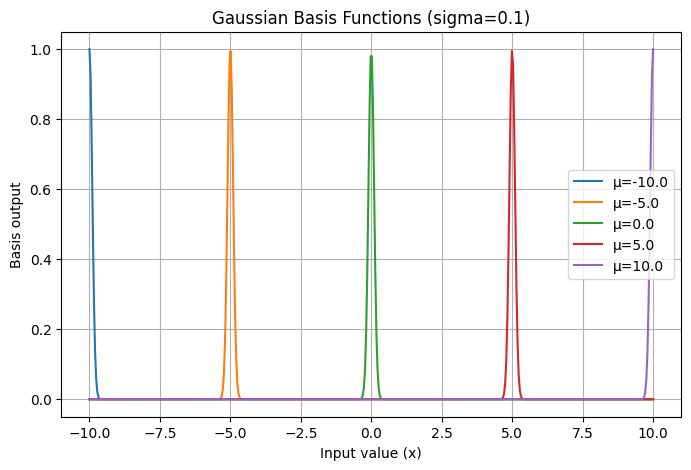

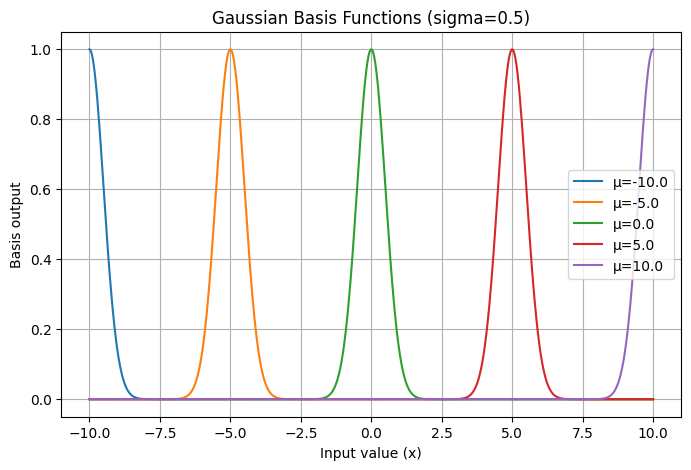

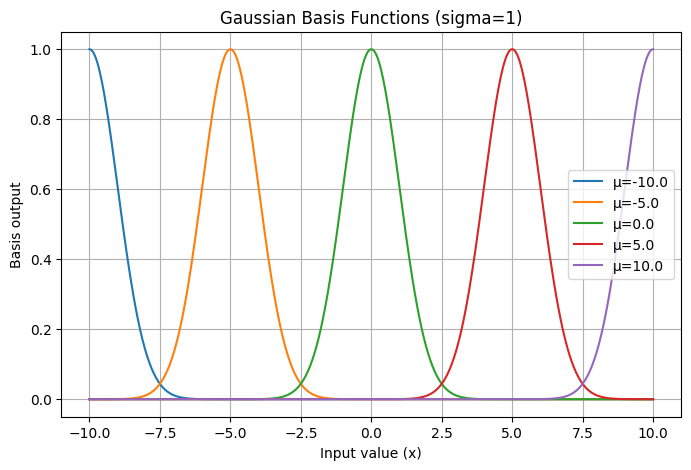

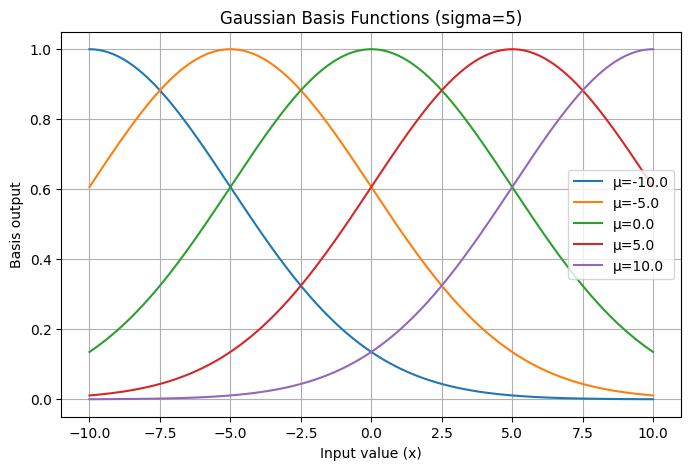

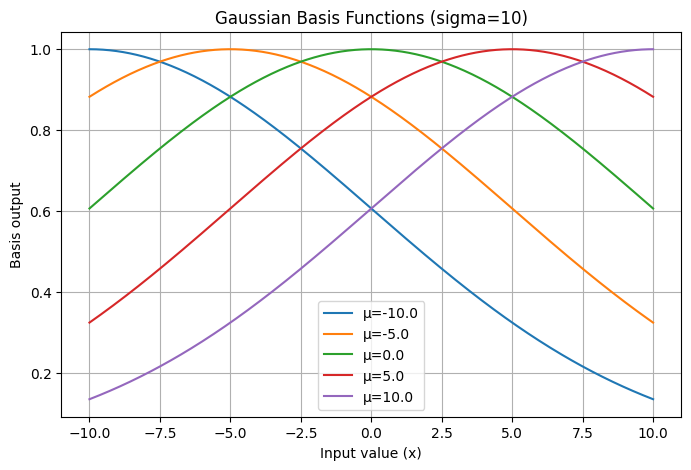

In [21]:
import numpy as np

def gbt(X, sigma, n_basis=5, low=-10, high=10, add_bias=True):
    """
    Gaussian Basis Transform
    
    X: Input matrix of shape (n_samples, n_features)
    sigma: Standard deviation of Gaussian
    n_basis: Number of Gaussian basis functions per feature
    low, high: Range for evenly spaced means
    add_bias: Whether to add bias (constant 1 column)
    """
    n_samples, n_features = X.shape
    
    # Means for Gaussian centers
    means = np.linspace(low, high, n_basis)
    print("Equally spaced means:", means)
    
    # Store transformed features
    transformed = []
    
    for j in range(n_features):
        for m in means:
            # Gaussian basis: exp(- (x - m)^2 / (2σ^2))
            transformed.append(np.exp(- (X[:, j] - m) ** 2 / (2 * sigma ** 2)))
    
    # Stack into shape (n_samples, n_features * n_basis)
    X_new = np.array(transformed).T  
    
    # Add bias term if needed
    if add_bias:
        X_new = np.hstack([np.ones((n_samples, 1)), X_new])
    
    return X_new

    
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 500)   # input values
means = np.linspace(-10, 10, 5) # 5 means: [-10, -5, 0, 5, 10]

# Try different σ values
sigmas = [0.1, 0.5, 1, 5, 10]

for sigma in sigmas:
    plt.figure(figsize=(8,5))
    for m in means:
        y = np.exp(-(x - m)**2 / (2 * sigma**2))   # Gaussian basis
        plt.plot(x, y, label=f"µ={m}")
    
    plt.title(f"Gaussian Basis Functions (sigma={sigma})")
    plt.xlabel("Input value (x)")
    plt.ylabel("Basis output")
    plt.legend()
    plt.grid(True)
    plt.show()


(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


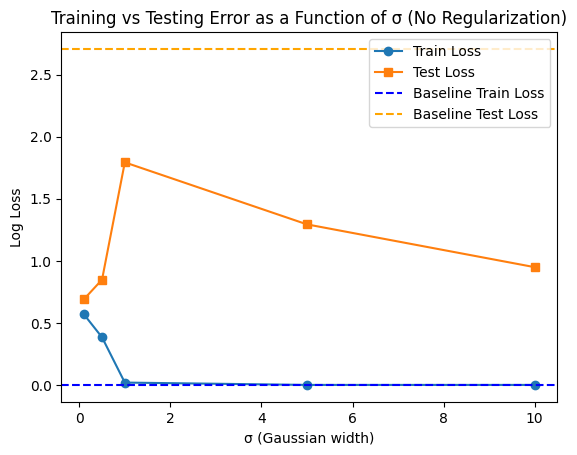

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Gaussian basis transform
def gbt(X, sigma, n_basis=5, low=-10, high=10):
    means = np.linspace(low, high, n_basis)
    features = []
    for j in range(X.shape[1]):
        for m in means:
            features.append(np.exp(-(X[:, j] - m) ** 2 / (2 * sigma**2)))
    return np.array(features).T

# --- baseline model from part (c) ---
baseline = LogisticRegression(penalty=None, solver="lbfgs", max_iter=5000)
baseline.fit(X_train, y_train)
baseline_train_loss = log_loss(y_train, baseline.predict_proba(X_train))
baseline_test_loss  = log_loss(y_test, baseline.predict_proba(X_test))

# --- test different σ values ---
sigmas = [0.1, 0.5, 1, 5, 10]
train_losses, test_losses = [], []

for sigma in sigmas:
    X_train_phi = gbt(X_train, sigma)
    X_test_phi  = gbt(X_test, sigma)

    model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=5000)
    model.fit(X_train_phi, y_train)

    train_losses.append(log_loss(y_train, model.predict_proba(X_train_phi)))
    test_losses.append(log_loss(y_test, model.predict_proba(X_test_phi)))

# --- plot ---
plt.plot(sigmas, train_losses, marker="o", label="Train Loss")
plt.plot(sigmas, test_losses, marker="s", label="Test Loss")
plt.axhline(baseline_train_loss, color="blue", linestyle="--", label="Baseline Train Loss")
plt.axhline(baseline_test_loss, color="orange", linestyle="--", label="Baseline Test Loss")
plt.xlabel("σ (Gaussian width)")
plt.ylabel("Log Loss")
plt.title("Training vs Testing Error as a Function of σ (No Regularization)")
plt.legend()
plt.show()


g:Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

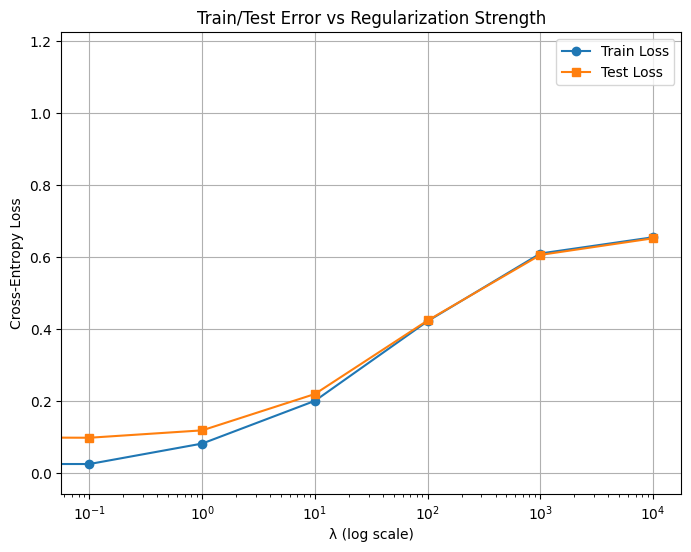

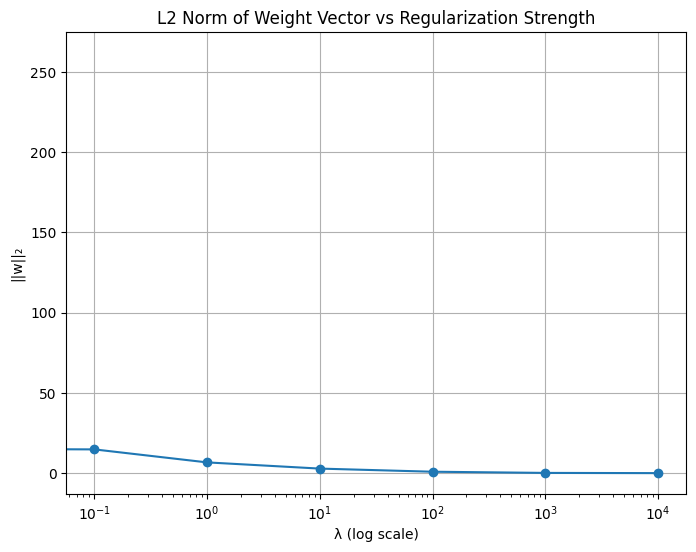

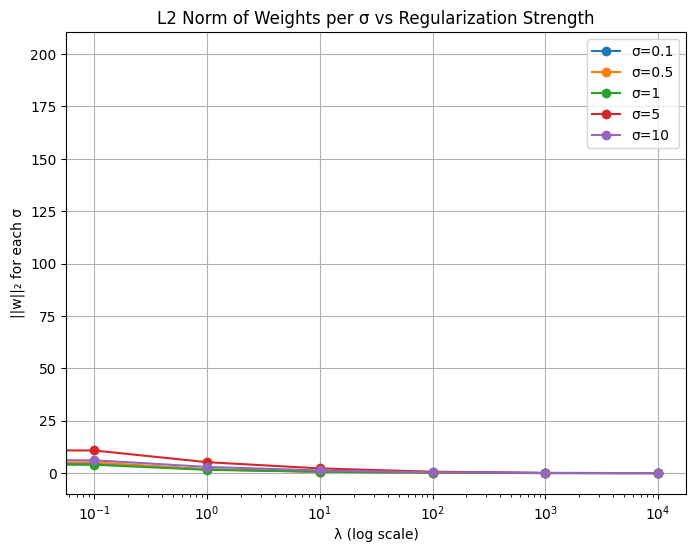

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Gaussian basis transform
def gbt(X, sigma, n_basis=5, low=-10, high=10):
    means = np.linspace(low, high, n_basis)
    features = []
    for j in range(X.shape[1]):
        for m in means:
            features.append(np.exp(-(X[:, j] - m) ** 2 / (2 * sigma**2)))
    return np.array(features).T

# --- parameters ---
sigmas = [0.1, 0.5, 1, 5, 10]
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

# Combine all basis functions for all sigmas
def build_full_features(X):
    features = []
    for sigma in sigmas:
        features.append(gbt(X, sigma))
    return np.hstack(features)

X_train_full = build_full_features(X_train)
X_test_full  = build_full_features(X_test)

# Store results
train_losses, test_losses = [], []
weight_norms = []
sigma_weight_norms = {sigma: [] for sigma in sigmas}

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=5000)
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=5000)
    
    model.fit(X_train_full, y_train)

    # Losses
    train_losses.append(log_loss(y_train, model.predict_proba(X_train_full)))
    test_losses.append(log_loss(y_test, model.predict_proba(X_test_full)))

    # L2 norm of all weights
    W = model.coef_.flatten()
    weight_norms.append(np.linalg.norm(W))

    # Split weights per σ block
    block_size = X_train.shape[1] * 5  # 5 basis per feature
    for i, sigma in enumerate(sigmas):
        start = i * block_size
        end = (i+1) * block_size
        sigma_weight_norms[sigma].append(np.linalg.norm(W[start:end]))

# --- Plot 1: Train/Test error vs λ ---
plt.figure(figsize=(8,6))
plt.plot(lambdas, train_losses, marker="o", label="Train Loss")
plt.plot(lambdas, test_losses, marker="s", label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train/Test Error vs Regularization Strength")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Total L2 norm of weights vs λ ---
plt.figure(figsize=(8,6))
plt.plot(lambdas, weight_norms, marker="o")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂")
plt.title("L2 Norm of Weight Vector vs Regularization Strength")
plt.grid(True)
plt.show()

# --- Plot 3: L2 norm per σ vs λ ---
plt.figure(figsize=(8,6))
for sigma in sigmas:
    plt.plot(lambdas, sigma_weight_norms[sigma], marker="o", label=f"σ={sigma}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂ for each σ")
plt.title("L2 Norm of Weights per σ vs Regularization Strength")
plt.legend()
plt.grid(True)
plt.show()


Linear Regression - Regression Metrics
MSE: 2900.1936284934814
R2 Score: 0.4526027629719195

Ridge Regression - Regression Metrics
MSE: 3077.4159388272296
R2 Score: 0.41915292635986556

Lasso Regression - Regression Metrics
MSE: 2798.1934851697188
R2 Score: 0.4718547867276227

Logistic Regression - Classification Metrics
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



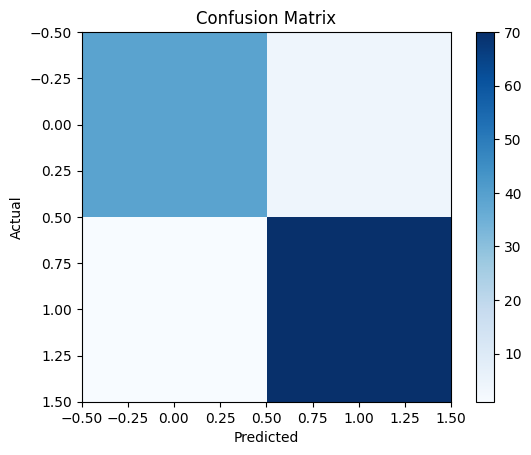

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# -------------------------------
# 1. Regression on Diabetes Dataset
# -------------------------------
# Load built-in dataset
diabetes = load_diabetes(as_frame=True)
X_reg, y_reg = diabetes.data, diabetes.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("Linear Regression - Regression Metrics")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score:", r2_score(y_test, y_pred_lin))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression - Regression Metrics")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression - Regression Metrics")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))


# -------------------------------
# 2. Classification on Breast Cancer Dataset
# -------------------------------
cancer = load_breast_cancer(as_frame=True)
X_clf, y_clf = cancer.data, cancer.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\nLogistic Regression - Classification Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_log)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
